### 1. 데이터 로드

In [1]:
import pandas as pd
gender_submission = pd.read_csv("../input/titanic/gender_submission.csv")
test = pd.read_csv("../input/titanic/test.csv")
train = pd.read_csv("../input/titanic/train.csv")

### 2. 데이터 확인

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# 결측치 확인
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- N = 891
- Age: 177 결측치 / Cabin: 687 결측치 / Embarked: 2 결측치

#### 1) EDA

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [14]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Surevived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10,5))

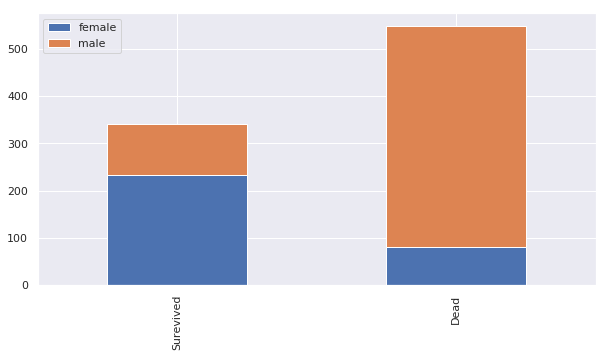

In [15]:
bar_chart('Sex')

남성의 사망이 더 높음

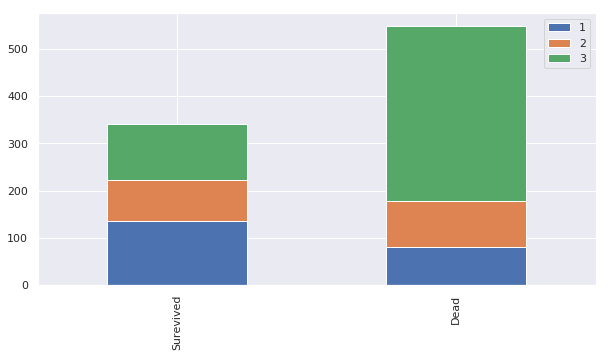

In [16]:
bar_chart('Pclass')

3등석의 사망이 가장 많았고, 1등석의 생존이 가장 많았음

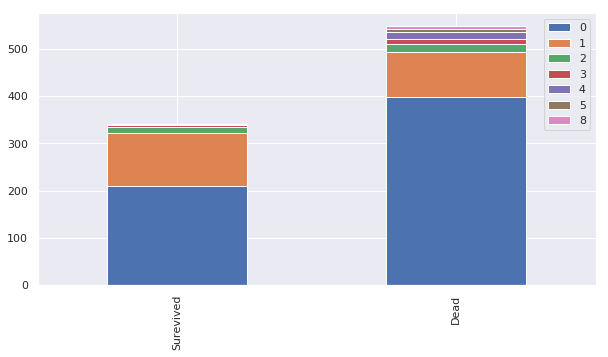

In [17]:
bar_chart('SibSp')

=> Pclass, Sex,,, Survived 에 영양을 미침
이를 바탕으로 데이터를 Feature Engineering 진행

### 3. Feature Engineering
: 머신러닝의 정확도를 높이기 위해서 사용

#### 1) 데이터 가공

In [ ]:
# Cabin, Ticket 삭제